In [1]:
import pandas as pd
import numpy as np

# Increase the maximum number of rows & columns displayed to 50.
pd.set_option('display.max_column', 50)
pd.set_option('display.max_row', 50)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
data = pd.read_csv('../Data/acs_data_new.csv', header=0)

In [4]:
#data.head()

In [5]:
#data.describe()

In [6]:
#data[data['Median income'] == '-' ]

In [7]:
#Since all the values in the Ids 397 and 795 are missing, deleting these 2 rows
#data = data.drop(data[data['Median income'] == '-' ].index)

In [8]:
# following two census tracts which are present in 2010 and not in 2015, hence deleting them
#53033005302: not present in 2015
#53033032800: not present in 2015
#53033004302: not present in 2010

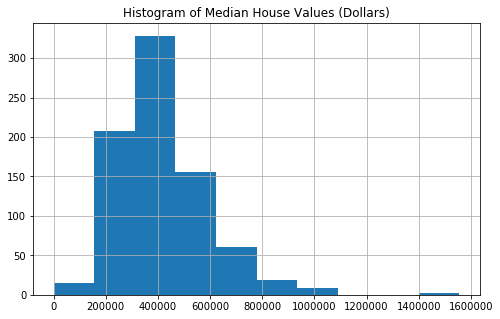

In [9]:
# Alternate histogram plot
fig, axs = plt.subplots(1, 1, figsize=(8, 5), sharex=True, sharey=True)
plt.grid(True) # Show grid
plt.hist(data['median house value'])
plt.title("Histogram of Median House Values (Dollars)")

(array([  15.,  207.,  328.,  156.,   60.,   19.,    9.,    0.,    0.,    2.]),
 array([       0.,   155560.,   311120.,   466680.,   622240.,   777800.,
          933360.,  1088920.,  1244480.,  1400040.,  1555600.]),
 <a list of 10 Patch objects>)

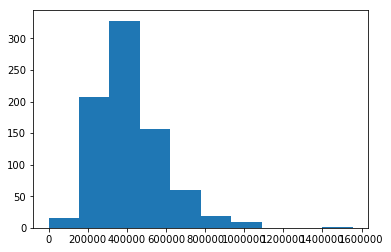

In [10]:
plt.hist(data['median house value'])

### Definition 1: Sociology 
#### Eligible for Gentrification:
* The block group’s median household income was in the bottom 40th percentile when compared to all block groups in Seattle at the beginning of the time span.
* The block group’s median house value was in the bottom 40th percentile when compared to all block groups in Seattle at the beginning of the time span.

#### Have gentrified:
* An increase in a block group’s educational attainment, as measured by the percentage of residents age 25 and over holding bachelor’s degrees, was in the top third percentile of all block groups in Seattle.
* An increase in a block group’s median house value, as measured by inflation-adjusted median house value, was in the top third percentile of all block groups in Seattle.


#### Calculations for Part1: Eligible for gentrification

In [11]:
# get the columns in variable names
median_income =np.array(data['median income'])
median_housevalue =np.array(data['median house value'])

In [12]:
# find percentiles for median income, house value and bachelor degree holders
income_40th_perc = np.percentile(median_income, 40)
houseval_40th_perc = np.percentile(median_housevalue, 40)

#### Calculations for Part2: Have gentrified

In [13]:
def add_col_for_inflation_adjusted_house_price_2010(row):
    if row['year'] == 2010:
        return row['median house value']*1.08

In [14]:
#inflation_adj_median_house_value = data.apply(add_col_for_inflation_adjusted_house_price_2010, axis = 1)
data['inflation_adj_median_house_value'] = data.apply(add_col_for_inflation_adjusted_house_price_2010, axis = 1)

In [15]:
# get unique tract ids to iterate thru all records of 2015 and 2010
tract_id = data.Id.unique()

In [16]:
increase_in_edu_attainment_2015 = []
for s in tract_id:
    i = np.where(data['Id'] == s) # gives two indexes for each tract id(one for 2015 and another for 2010)
    # to find the percentage increase subtract the bachelors degree % for 2010 from bachelors degree % of 2015
    perc_increase = data['bachelor deg 25yr+'].iloc[i[0][0]] - data['bachelor deg 25yr+'].iloc[i[0][1]]
    increase_in_edu_attainment_2015.append(perc_increase)

In [17]:
increase_in_house_value_2015 = []
for s in tract_id:
    i = np.where(data['Id'] == s)
    perc_increase = data['median house value'].iloc[i[0][0]] - data['inflation_adj_median_house_value'].iloc[i[0][1]]
    increase_in_house_value_2015.append(perc_increase)

In [18]:
data['increase_in_edu_attainment_2015'] = pd.Series(increase_in_edu_attainment_2015)
data['increase_in_house_value_2015'] = pd.Series(increase_in_house_value_2015)

In [19]:
increase_bachelor_degree_top3rd_percentile = np.percentile(increase_in_edu_attainment_2015, 66)
increase_house_value_top3rd_percentile = np.percentile(increase_in_house_value_2015, 66)

In [20]:
increase_house_value_top3rd_percentile

-37002.719999999994

#### Labelling the tracts per definition 1

In [21]:
def label_def1(row):
   if row['year'] == 2010:
      return 'None'
   if row['year'] == 2015 and row['increase_in_edu_attainment_2015'] > increase_bachelor_degree_top3rd_percentile and row['increase_in_house_value_2015'] > increase_house_value_top3rd_percentile:
      return 'HaveGentrified'
   if row['year'] == 2015 and row['median income'] < income_40th_perc and row['median house value'] < houseval_40th_perc:
      return 'EligibleForGentrification'
   else:
      return 'NotEligibleForGentrification'

In [22]:
data['def1'] = data.apply(label_def1, axis=1)

In [23]:
data.head()

,Id,Geography,neighborhood,city,year,total population,total households,median house value,percent public transportation,percent white not hispanic,median income,median family income,percent nonfamily household,median gross rent,median_contract_rent,percent renter-occupied housing units,monthly housing costs 30+ percent of renter householdhold income,rent 35-39.9 percent of household income,rent 40-49.9 percent of household income,rent 50 percent of household income,not computed rent as percent of household income,3-4 dwelling units,5+ dwelling units,3+ vehicles available,percent bachelors degree or higher,...,"household income 75,000-99,999","household income 100,000-124,999","household income 125,000-149,999","household income 150,000-199,999","household income 200,000+",total count household income,total population 25yr+,total female 25-29yr,total female 30-39yr,total female 40-49yr,total female 50-59yr,total female 60-64yr,total female 65-69yr,total female 70yr+,total male 25-29yr,total male 30-39yr,total male 40-49yr,total male 50-59yr,total male 60-64yr,total male 65-69yr,total male 70yr+,inflation_adj_median_house_value,increase_in_edu_attainment_2015,increase_in_house_value_2015,def1
0,53033000100,"Census Tract 1, King County, Washington",Victory Heights,Seattle,2015,6918,3400,410700,0.198666,0.576323,44951,79896,0.579706,981,892.0,0.682059,26.2,70,266,763,85,269,2170,405,45.0,...,392,229,122,213,208,3400,5010,421,555,442,349,318,198,301,324,635,457,461,182,134,233,NaN,307.0,-126384.0,NotEligibleForGentrification
1,53033000100,"Census Tract 1, King County, Washington",Victory Heights,Seattle,2010,5784,3110,497300,0.216394,0.575726,47518,1274,0.590354,838,775.0,0.713183,625.0,132,134,473,60,111,1967,290,46.9,...,249,243,108,118,147,3110,4454,318,475,444,572,43,48,210,519,606,440,445,125,46,163,537084.0,32.0,-44996.0,None
2,53033000200,"Census Tract 2, King County, Washington",Pinehurst,Seattle,2015,7974,3572,342400,0.174445,0.566842,56208,69870,0.422732,1128,993.0,0.463326,42.4,152,227,299,162,97,1456,383,52.7,...,336,345,164,261,88,3572,5880,424,511,520,563,395,262,555,494,497,432,588,244,153,242,NaN,-67.0,-37920.0,EligibleForGentrification
3,53033000200,"Census Tract 2, King County, Washington",Pinehurst,Seattle,2010,7682,3633,358700,0.152393,0.700729,54797,1899,0.477291,906,828.0,0.444536,554.0,156,73,339,266,160,1433,398,49.3,...,451,356,217,85,79,3633,5782,362,513,567,632,225,183,479,383,609,638,665,122,115,289,387396.0,275.0,-78068.0,None
4,53033000300,"Census Tract 3, King County, Washington",Pinehurst,Seattle,2015,2637,1087,336300,0.220242,0.712931,64297,87604,0.447102,1225,1028.0,0.440662,37.0,17,77,119,22,27,174,143,33.1,...,173,78,67,106,75,1087,1916,54,195,185,155,81,87,114,227,228,152,253,57,60,68,NaN,499.0,-12992.0,HaveGentrified


### Definition 2: Financial & Economics
#### Currently gentrifying:
* The block group’s income levels below 40% of the median, and experienced rent increases greater than the median neighborhood did.

#### Have gentrified:
* The block group’s share of neighborhoods in a metro area that moved from the bottom half to the top half in the distribution of home prices.

#### Calculations for Part1: Currently gentrifying

In [24]:
median_income_40percent = np.percentile(median_income, 50)*0.4

#### Rent increase is NOT AVAILABLE. The data has renter occupied units which is different from rent. We are using renter occupied variable in definition 3. Need to discuss this.

In [25]:
rent_increase = data['median gross rent']
median_rent_increase = np.percentile(rent_increase, 50)

#### Calculations for Part2: Have gentrified

In [26]:
Data_for_2010 = np.where(data['year']== 2010)
home_price_50th_percentile_2010 = np.percentile(Data_for_2010, 50)

In [27]:
Data_for_2015 = np.where(data['year']== 2015)
home_price_50th_percentile_2015 = np.percentile(Data_for_2015, 50)

In [28]:
increase_in_home_price_distribution_2015 = []
for s in tract_id:
    i = np.where(data['Id'] == s)
    if data['median house value'].iloc[i[0][0]] > home_price_50th_percentile_2015 and data['median house value'].iloc[i[0][1]] < home_price_50th_percentile_2010:
        increase_in_home_price_distribution_2015.append('true')
    else:
        increase_in_home_price_distribution_2015.append('false') 

#### This doesnt look good, all values are FALSE. We might be interpreting this incorrectly. Need to discuss.

In [29]:
data['increase_in_home_price_distribution_2015'] = pd.Series(increase_in_home_price_distribution_2015)

#### Labelling the tracts per definition 2

In [30]:
def label_def2(row):
   if row['year'] == 2010:
      return 'None'
   if row['year'] == 2015 and row['increase_in_home_price_distribution_2015'] == 'true': 
      return 'HaveGentrified'
   if row['year'] == 2015 and row['median income'] < median_income_40percent and row['median gross rent'] < median_rent_increase:
      return 'CurrentlyGentrifying'
   else:
      return 'NotCurrentlyGentrifying'

In [31]:
data['def2'] = data.apply(label_def2, axis=1)

In [32]:
data.head()

,Id,Geography,neighborhood,city,year,total population,total households,median house value,percent public transportation,percent white not hispanic,median income,median family income,percent nonfamily household,median gross rent,median_contract_rent,percent renter-occupied housing units,monthly housing costs 30+ percent of renter householdhold income,rent 35-39.9 percent of household income,rent 40-49.9 percent of household income,rent 50 percent of household income,not computed rent as percent of household income,3-4 dwelling units,5+ dwelling units,3+ vehicles available,percent bachelors degree or higher,...,"household income 125,000-149,999","household income 150,000-199,999","household income 200,000+",total count household income,total population 25yr+,total female 25-29yr,total female 30-39yr,total female 40-49yr,total female 50-59yr,total female 60-64yr,total female 65-69yr,total female 70yr+,total male 25-29yr,total male 30-39yr,total male 40-49yr,total male 50-59yr,total male 60-64yr,total male 65-69yr,total male 70yr+,inflation_adj_median_house_value,increase_in_edu_attainment_2015,increase_in_house_value_2015,def1,increase_in_home_price_distribution_2015,def2
0,53033000100,"Census Tract 1, King County, Washington",Victory Heights,Seattle,2015,6918,3400,410700,0.198666,0.576323,44951,79896,0.579706,981,892.0,0.682059,26.2,70,266,763,85,269,2170,405,45.0,...,122,213,208,3400,5010,421,555,442,349,318,198,301,324,635,457,461,182,134,233,NaN,307.0,-126384.0,NotEligibleForGentrification,false,NotCurrentlyGentrifying
1,53033000100,"Census Tract 1, King County, Washington",Victory Heights,Seattle,2010,5784,3110,497300,0.216394,0.575726,47518,1274,0.590354,838,775.0,0.713183,625.0,132,134,473,60,111,1967,290,46.9,...,108,118,147,3110,4454,318,475,444,572,43,48,210,519,606,440,445,125,46,163,537084.0,32.0,-44996.0,None,false,None
2,53033000200,"Census Tract 2, King County, Washington",Pinehurst,Seattle,2015,7974,3572,342400,0.174445,0.566842,56208,69870,0.422732,1128,993.0,0.463326,42.4,152,227,299,162,97,1456,383,52.7,...,164,261,88,3572,5880,424,511,520,563,395,262,555,494,497,432,588,244,153,242,NaN,-67.0,-37920.0,EligibleForGentrification,false,NotCurrentlyGentrifying
3,53033000200,"Census Tract 2, King County, Washington",Pinehurst,Seattle,2010,7682,3633,358700,0.152393,0.700729,54797,1899,0.477291,906,828.0,0.444536,554.0,156,73,339,266,160,1433,398,49.3,...,217,85,79,3633,5782,362,513,567,632,225,183,479,383,609,638,665,122,115,289,387396.0,275.0,-78068.0,None,false,None
4,53033000300,"Census Tract 3, King County, Washington",Pinehurst,Seattle,2015,2637,1087,336300,0.220242,0.712931,64297,87604,0.447102,1225,1028.0,0.440662,37.0,17,77,119,22,27,174,143,33.1,...,67,106,75,1087,1916,54,195,185,155,81,87,114,227,228,152,253,57,60,68,NaN,499.0,-12992.0,HaveGentrified,false,NotCurrentlyGentrifying


### Definition 3: Urban Planning
#### In danger of gentrifying:
* The block group’s % of workers taking transit increased
* The block group’s youth facilities per 1000 residents increased
* The block group’s public space per 1000 residents increased
* The block group’s % non-family households increased
* The block group’s % dwelling units in building with 5+ units increased
* The block group’s % dwelling units in building with 3-4 units increased
* The block group’s % renter-occupied increased
* The block group’s income diversity increased
* The block group’s % of renters paying >35% of income increased
* The block group’s % of dwelling units with three or more cars available decreased
* The block group’s recreational facilities per 1000 residents decreased
* The block group’s % married couples with children decreased
* The block group’s % non-hispanic white decreased

#### Calculations for Part1: In danger of gentrifying

In [33]:
data['percent public transportation'] = data['percent public transportation']*100

increase_in_workers_taking_transit_2015 = []

for s in tract_id:
    i = np.where(data['Id'] == s)
    if data['percent public transportation'].iloc[i[0][0]] > data['percent public transportation'].iloc[i[0][1]]:
        increase_in_workers_taking_transit_2015.append('true')
    else:
        increase_in_workers_taking_transit_2015.append('false') 
        
data['increase_in_workers_taking_transit_2015'] = pd.Series(increase_in_workers_taking_transit_2015)        

In [34]:
data['percent nonfamily household'] = data['percent nonfamily household']*100

increase_in_non_family_households_2015 = []

for s in tract_id:
    i = np.where(data['Id'] == s)
    if data['percent nonfamily household'].iloc[i[0][0]] > data['percent nonfamily household'].iloc[i[0][1]]:
        increase_in_non_family_households_2015.append('true')
    else:
        increase_in_non_family_households_2015.append('false') 
        
data['increase_in_non_family_households_2015'] = pd.Series(increase_in_non_family_households_2015)      

In [35]:
increase_in_dwelling_units_5_or_more_2015 = []

for s in tract_id:
    i = np.where(data['Id'] == s)
    if data['5+ dwelling units'].iloc[i[0][0]] > data['5+ dwelling units'].iloc[i[0][1]]:
        increase_in_dwelling_units_5_or_more_2015.append('true')
    else:
        increase_in_dwelling_units_5_or_more_2015.append('false') 
        
data['increase_in_dwelling_units_5_or_more_2015'] = pd.Series(increase_in_dwelling_units_5_or_more_2015)      

In [36]:
increase_in_dwelling_units_3_or_4_2015 = []

for s in tract_id:
    i = np.where(data['Id'] == s)
    if data['3-4 dwelling units'].iloc[i[0][0]] > data['3-4 dwelling units'].iloc[i[0][1]]:
        increase_in_dwelling_units_3_or_4_2015.append('true')
    else:
        increase_in_dwelling_units_3_or_4_2015.append('false') 
        
data['increase_in_dwelling_units_3_or_4_2015'] = pd.Series(increase_in_dwelling_units_3_or_4_2015)   

In [37]:
data['percent renter-occupied housing units'] = data['percent renter-occupied housing units']*100

increase_in_renter_occupied_housing_units_2015 = []

for s in tract_id:
    i = np.where(data['Id'] == s)
    if data['percent renter-occupied housing units'].iloc[i[0][0]] > data['percent renter-occupied housing units'].iloc[i[0][1]]:
        increase_in_renter_occupied_housing_units_2015.append('true')
    else:
        increase_in_renter_occupied_housing_units_2015.append('false') 
        
data['increase_in_renter_occupied_housing_units_2015'] = pd.Series(increase_in_renter_occupied_housing_units_2015)        

In [38]:
decrease_in_vehicles_3_or_more = []

for s in tract_id:
    i = np.where(data['Id'] == s)
    if data['3+ vehicles available'].iloc[i[0][0]] < data['3+ vehicles available'].iloc[i[0][1]]:
        decrease_in_vehicles_3_or_more.append('true')
    else:
        decrease_in_vehicles_3_or_more.append('false') 
        
data['decrease_in_vehicles_3_or_more'] = pd.Series(decrease_in_vehicles_3_or_more) 

#### Labelling the tracts per definition 3

#### Are the below conditions a part of 'and' or 'or'? Need to discuss

In [44]:
def label_def3(row):
   if row['year'] == 2010:
      return 'None'
   if row['year'] == 2015 and (row['increase_in_workers_taking_transit_2015'] == 'true'and row['increase_in_non_family_households_2015'] == 'true' and row['increase_in_dwelling_units_5_or_more_2015'] == 'true' and row['increase_in_dwelling_units_3_or_4_2015'] == 'true'and row['increase_in_renter_occupied_housing_units_2015'] == 'true' and row['decrease_in_vehicles_3_or_more'] == 'true'):
      return 'InDangerOfGentrifying'
   else:
      return 'NotInDangerOfGentrifying'

In [45]:
data['def3'] = data.apply(label_def3, axis=1)

### Output data to csv file

In [46]:
# index=False doesn't add an extra column in the CSV file with the index
data.to_csv('../Data/ACS_data_with_labels_Feb4.csv', encoding='utf-8', index=False)